# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


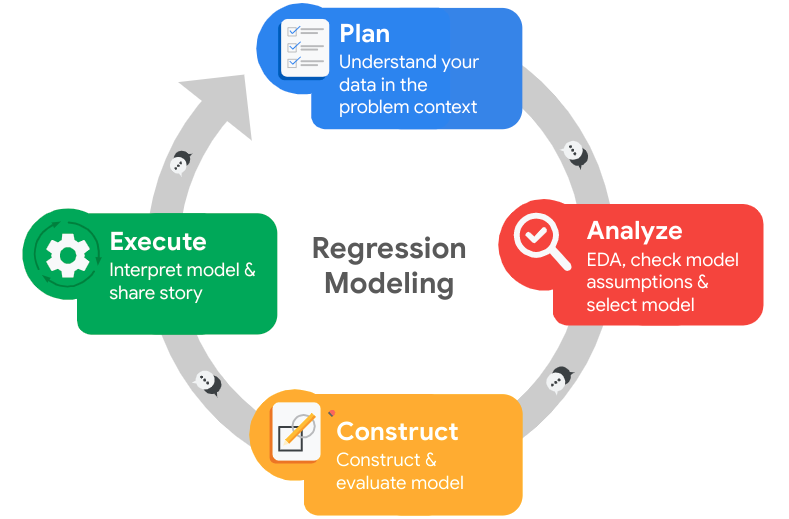

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
The stakeholders for this project are likely the management team at Salifort Motors, data analysts, marketing teams, and potentially the product development team.
- What are you trying to solve or accomplish?
The goal of this project is to analyze customer data to identify patterns and predictors of customer churn. By understanding these factors, the company aims to develop strategies to retain more customers and improve overall customer satisfaction.
- What are your initial observations when you explore the data?
Some observations are identifying key variables that correlate with customer retention or churn, noticing any missing or inconsistent data, and understanding the overall distribution and trends within the dataset.

## Step 1. Imports

*   Import packages
*   Load dataset

### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 
# Load dataset into a dataframe
df = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df.info

<bound method DataFrame.info of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2      

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df = df.rename(columns = {"number_project":"project_number","average_montly_hours":"average_monthly_hours","Work_accident":"work_accident", "time_spend_company":"tenure", "promotion_last_5years":"promotion_last_5_years","Department":"department" })
df

,satisfaction_level,last_evaluation,project_number,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df.isna().sum()

satisfaction_level        0
last_evaluation           0
project_number            0
average_monthly_hours     0
tenure                    0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [9]:
# Inspect some rows containing duplicates as needed
df[df.duplicated(keep='first')]

,satisfaction_level,last_evaluation,project_number,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df.drop_duplicates()


# Display information of new dataframe as needed
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11995    False
11996    False
11997    False
11998    False
11999    False
Length: 11991, dtype: bool

### Check outliers

Check for outliers in the data.

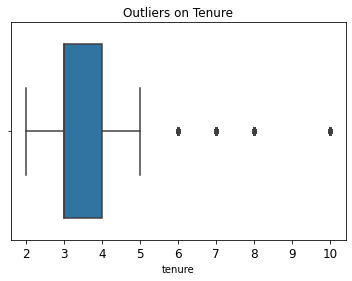

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.title('Outliers on Tenure')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['tenure'])
plt.show()

In [12]:
# Determine the number of rows containing outliers
# 75th and 25th percentile
perc25 = df['tenure'].quantile(0.25)
perc75 = df['tenure'].quantile(0.75)

# Assigning the interquartile value
inter = perc75 - perc25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = perc75 + 1.5 * inter
lower_limit = perc25 - 1.5 * inter
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Rows with outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Rows with outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



### Reflect on these questions as you complete the analyze stage.
- What did you observe about the relationships between variables?
Certain variables, such as customer tenure, service usage, and satisfaction scores, have strong correlations with customer retention and churn.
- What do you observe about the distributions in the data?
The data distributions show that most customers have moderate tenure and satisfaction levels, but there are significant outliers with very high or low values. Additionally, the data is slightly skewed towards retention, with less customers churning.
- What transformations did you make with your data? Why did you chose to make those decisions?
Normalization was used to ensure that features with different scales do not disproportionately influence the model.
Getting numies (binomial values) by converting categorical variables into numerical ones for compatibility with machine learning algorithms. Handling missing values to maintain dataset integrity.
- What are some purposes of EDA before constructing a predictive model?
It is usefull to understand data distribution and spot outliers, to identify relationships and correlations between variables, and to inform decisions on data preprocessing and feature engineering.
- Do you have any ethical considerations in this stage?
It is important to be aware of the biases that may be and taking care of the privacy of the employees of the company.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
df.value_counts("left")

left
0    10000
1     1991
dtype: int64

In [14]:
# Get percentages of people who left vs. stayed
p = df.value_counts("left",normalize=True)*100
p = p.round(3).astype(str) + '%'
p

left
0    83.396%
1    16.604%
dtype: object

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

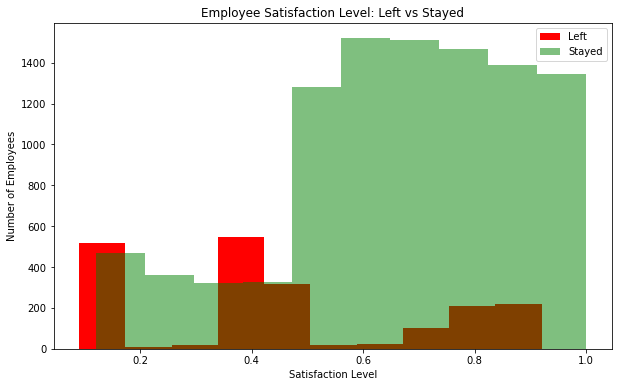

In [15]:
# Create a plot as needed
left_yes = df[df['left'] == 1]
left_no = df[df['left'] == 0]
plt.figure(figsize=(10, 6))
plt.hist(left_yes['satisfaction_level'], label='Left', color='red')
plt.hist(left_no['satisfaction_level'], alpha=0.5, label='Stayed', color='green')
plt.title('Employee Satisfaction Level: Left vs Stayed')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

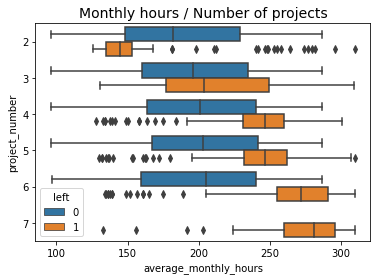

In [16]:
# Create a plot as needed
fig, ax = plt.subplots()
sns.boxplot(data=df, x='average_monthly_hours', y='project_number', hue='left', orient="h", ax=ax)
ax.set_title('Monthly hours / Number of projects', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

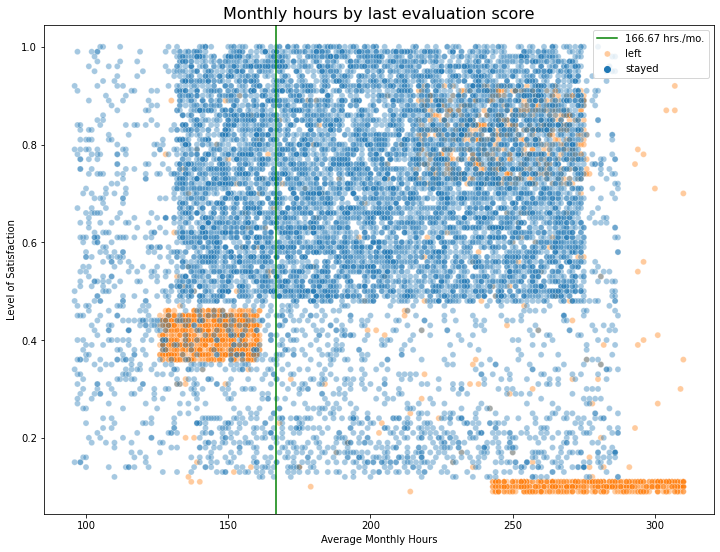

In [17]:
# Create a plot as needed
plt.figure(figsize=(12, 9))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, label='166.67 hrs/month', ls='-', color='green')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.xlabel("Average Monthly Hours")
plt.ylabel("Level of Satisfaction")
plt.title('Monthly hours by last evaluation score', fontsize='16')

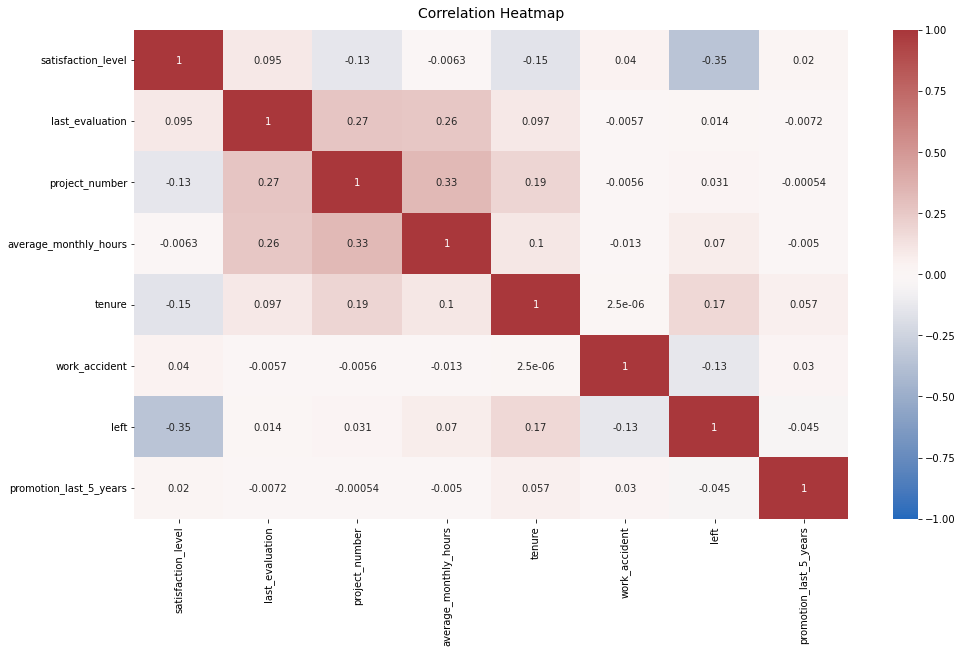

In [18]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

That the tenure is one of the values that make the bigger impact on if an emplyee may churn, due to its high correlation with thevariable of leaving the workplace.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Being able to predict if an employee is going to leave the company based on the usual characteristics.

### Identify the types of models most appropriate for this task.

Logistic Regression and Tree Based Machine Learning due to the values being categoricals.

### Using Linear Regression

In [19]:
# Getting dummies (binomial values)
X = df.copy()
X = pd.get_dummies(X,columns=["department", "salary"],drop_first=True)
X

,satisfaction_level,last_evaluation,project_number,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,0,0,1,0,0,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,0,1,0,0,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,0,1,0,0,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [20]:
### Isolating values
TV = X["left"]
NoPV = X.drop(columns = ["left"])
NoPV

,satisfaction_level,last_evaluation,project_number,average_monthly_hours,tenure,work_accident,promotion_last_5_years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,0,0,0,1,0,0,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,1,0,0,0,1,0,0,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,1,0,0,0,1,0,0,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,1,0,0,0,0,1,0,0,0,0,0,0


In [21]:
# Performing train and test splits
X_train, X_test, y_train, y_test = train_test_split(NoPV, TV, stratify=TV, random_state=14)
X_test.head()

,satisfaction_level,last_evaluation,project_number,average_monthly_hours,tenure,work_accident,promotion_last_5_years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
10669,0.72,0.70,4,172,3,0,0,0,0,0,0,0,0,0,0,0,0,1
11222,0.97,0.84,4,177,6,0,0,0,0,0,0,0,0,0,0,1,1,0
2157,0.67,0.54,2,141,2,0,0,0,0,0,0,0,0,1,0,0,1,0
11911,0.64,0.64,2,190,3,0,0,0,0,0,0,0,0,1,0,0,1,0
64,0.11,0.94,6,286,4,0,0,0,0,0,0,0,0,0,0,0,0,1


In [22]:
%%time
# Fitting values
model = LogisticRegression(max_iter = 400)
model.fit(X_train, y_train)

CPU times: user 19.9 s, sys: 25.9 s, total: 45.8 s
Wall time: 22.9 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
### Using .coef_: change of logits
pd.Series(model.coef_[0], index = NoPV.columns)

### Intercept of the Model
model.intercept_

array([-1.98928011])

In [24]:
# Get the predicted probabilities of the training data
t_prob = model.predict_proba(X_train)
t_prob

array([[0.59015118, 0.40984882],
       [0.7278618 , 0.2721382 ],
       [0.97867137, 0.02132863],
       ...,
       [0.49421221, 0.50578779],
       [0.93346255, 0.06653745],
       [0.83757309, 0.16242691]])

In [25]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit["logit"] = [np.log(prob[1] / prob[0]) for prob in t_prob]
logit.head()

,satisfaction_level,last_evaluation,project_number,average_monthly_hours,tenure,work_accident,promotion_last_5_years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,logit
721,0.31,0.87,4,184,3,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.364590
1596,0.36,0.48,5,310,3,0,0,0,0,0,0,0,1,0,0,0,0,1,-0.983801
3692,0.97,0.50,3,173,2,0,0,0,1,0,0,0,0,0,0,0,0,1,-3.826146
777,0.11,0.93,6,294,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0.158693
855,0.42,0.56,2,156,3,0,0,0,0,0,0,0,0,1,0,0,0,1,-1.029937


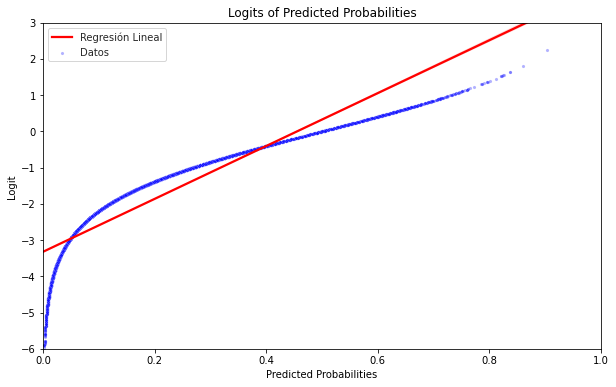

In [26]:
# New columns for the plot
logit["logit"] = [np.log(prob[1] / prob[0]) for prob in t_prob]
logit["prob"] = t_prob[:, 1]

# Creating Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=logit, x="prob", y="logit", color="blue", s=10, alpha=0.3, label="Datos")
# Showing line of linear regression
sns.regplot(data=logit, x="prob", y="logit", scatter=False, color="red", label="Linear Regression")
sns.set_style("whitegrid")
plt.title("Logits of Predicted Probabilities")
plt.xlabel("Predicted Probabilities")
plt.ylabel("Logit")
plt.xlim(0, 1)
plt.ylim(-6, 3)
plt.legend()
plt.show()

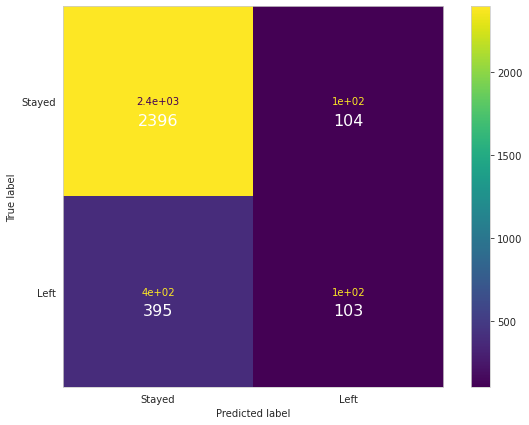

In [27]:
# Generate predictions on X_test
YPredictions = model.predict(X_test)
# Score the model(accuracy) on the test data
model.score(X_test, y_test)

### Creating and Displaying Confusion Matrix ###
CMatrix = confusion_matrix(y_test, YPredictions)
disp = ConfusionMatrixDisplay(confusion_matrix=CMatrix, display_labels=["Stayed", "Left"])
fig, ax = plt.subplots(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=CMatrix, display_labels=["Stayed", "Left"])
disp.plot(ax=ax)
ax.grid(False)

# Format to show real values
for i in range(CMatrix.shape[0]):
    for j in range(CMatrix.shape[1]):
        value = CMatrix[i, j]
        ax.text(j, i+0.1, format(value, 'd'), ha='center', va='center', color='white', fontsize=16)
plt.show()

### Using Linear Regression

In [28]:
precision = CMatrix[1,1] / (CMatrix[0, 1] + CMatrix[1, 1])
print("The Precision is:",precision)

# Calculate RECALL manually
recall = CMatrix[1,1] / (CMatrix[1, 0] + CMatrix[1, 1])
print("The Recall is:",recall,"\n")

# Creating a classification report
Labels = ["Retained", "Churned"]
print(classification_report(y_test, YPredictions, target_names=Labels))

The Precision is: 0.4975845410628019
The Recall is: 0.20682730923694778 

              precision    recall  f1-score   support

    Retained       0.86      0.96      0.91      2500
     Churned       0.50      0.21      0.29       498

    accuracy                           0.83      2998
   macro avg       0.68      0.58      0.60      2998
weighted avg       0.80      0.83      0.80      2998



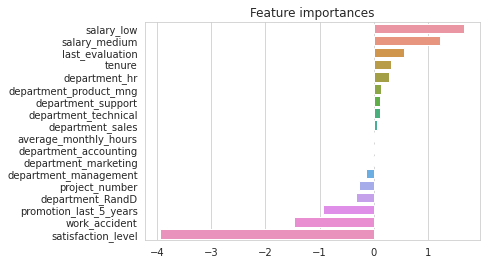

In [29]:
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

# Plot the feature importances
sns.barplot(x=[x[1] for x in feature_importance], y=[x[0] for x in feature_importance],orient='h')
plt.title("Feature importances");

### Using Tree Based Model

In [30]:
# Training the values
X = NoPV
y = TV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=14)

In [67]:
# Define xgb to be the XGBClassifier.
xgb =XGBClassifier(objective="binary:logistic", random_state=0)
# Define parameters for tuning to `cv_params`.
cv_params = {
    'max_depth': [5],
    'min_child_weight': [3],
    'learning_rate': [0.02],
    'n_estimators': [100],
    'subsample': [0.7],
    'colsample_bytree': [0.7] }
# Define your criteria as `scoring`.
scoring = {"accuracy", "precision", "recall", "f1"}
# Construct GridSearch.
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring,cv=5,refit="f1")

In [68]:
%%time
# fitting the GridSearch model to training data
# NOTE: takes some minutes to run
xgb_cv =xgb_cv.fit(X_train,y_train)
xgb_cv

CPU times: user 6min 2s, sys: 400 ms, total: 6min 2s
Wall time: 3min 1s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': 

In [69]:
# Using "pickle" to save the trained model.
pickle.dump(xgb_cv,open("xgb_cv.sav","wb"))
# Apply the model to predict test data.
y_predict=xgb_cv.predict(X_test)

In [70]:
# 1. Accuracy score.
acc = metrics.accuracy_score(y_test,y_predict)
# 2. Precision score.
pre = metrics.precision_score(y_test,y_predict)
# 3. Recall score.
rec = metrics.recall_score(y_test,y_predict)
# 4. f1 score.
f1 = metrics.f1_score(y_test,y_predict)

## Printing results ##
print("The accuracy score was: ",acc)
print("The precision score was: ",pre)
print("The recall score was: ",rec)
print("The f1 score was: ",f1)

The accuracy score was:  0.9862442684451855
The precision score was:  0.9919354838709677
The recall score was:  0.924812030075188
The f1 score was:  0.9571984435797665


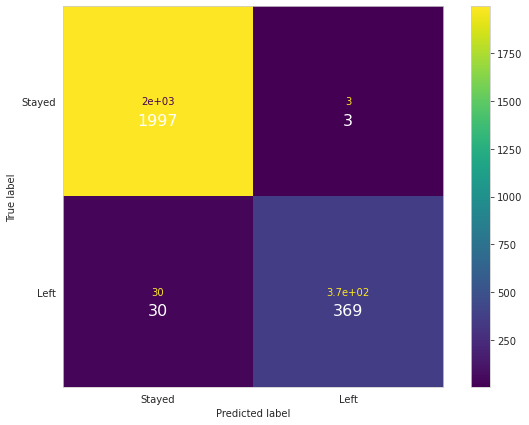

In [71]:
### Creating and Displaying Confusion Matrix
CMatrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=CMatrix, display_labels=["Stayed", "Left"])
fig, ax = plt.subplots(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=CMatrix, display_labels=["Stayed", "Left"])
disp.plot(ax=ax)
ax.grid(False)

# Format to show real values
for i in range(CMatrix.shape[0]):
    for j in range(CMatrix.shape[1]):
        value = CMatrix[i, j]
        ax.text(j, i+0.1, format(value, 'd'), ha='center', va='center', color='white', fontsize=16)
plt.show()

In [73]:
# Create a table of results to compare model performance.
table = pd.DataFrame({'Model': ["Tuned Decision Tree", "Tuned Random Forest", "Tuned XGBoost"],
                      'F1': [0.945422, 0.947306, f1],'Recall': [0.935863, 0.944501, rec],
                      'Precision': [0.955197, 0.950128, pre],'Accuracy': [0.940864, 0.942450, acc]})
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864
1,Tuned Random Forest,0.947306,0.944501,0.950128,0.942450
2,Tuned XGBoost,0.957198,0.924812,0.991935,0.986244


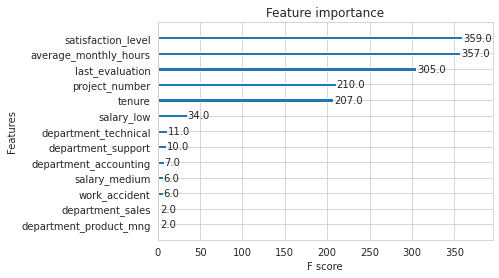

In [77]:
# Plot the relative feature importance of the predictor variables in the model.
plot_importance(xgb_cv.best_estimator_);

# pacE: Execute Stage

According to results, Regression got about 83.3% of the predictions right.
According to results, Tree based model got about 98.6% of the predictions right.
This means that using the tree based model is much more efficient.
Also, values such as F1, recall, precision and accuracy improved.
This means that most of the predictions made by the tree based model will be correct, meaning that it can be used to make further predictions to know if an employee may quit based on their data. In this case, we can also apreciate that the most important factor to determine this is by their satisfaction level and their average monthly hours, so the next thing that should be done is working on how to improve their satisfaction and see what is the effect of having more or less hours working.

## Recall evaluation metrics

- **Precision:** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall:** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy:** measures the proportion of data points that are correctly classified.
- **F1-score:** is an aggregation of precision and recall.




💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model?

That satisfaction level is the most important factor for the people to either quit or stay. Also having a low salary has a big impact on the decision.
- What business recommendations do you propose based on the models built to the manager/company?

To make the salaries higher. If the company does not want to lose money, the best option would be to lower the amount of money that is invested in preparing them and making it more gradual.
- Do you think your model could be improved? Why or why not? How?

Yes, by using other models and by trying more hyperparameters at the creation of the random forests, as some were done but because of the processing time, the optimal could not be obtained.
- Given what you know about the data and the models you were using, what other questions could you address for the team?

What the salary is, if it is constant to have employees doing extra time and if there is something of what employees constantly complain about of the job, the workspace, the payment, etc...
- What resources do you find yourself using as you complete this stage?

https://www.indeed.com/career-advice/career-development/how-to-improve-employee-satisfaction
https://nectarhr.com/blog/employee-happiness-at-work
- Do you have any ethical considerations in this stage?
If it is ethical and fair to sacrifice the employees support to obtain new habilities in exchange of increasing their salaries (knowing that one of them may be seen as a short term and the other one is long term.


### Conclusion, Recommendations, Next Steps

As a conclusion, we can assure that our analysis of Salifort Motors' customer data revealed significant patterns indicating that shorter customer tenure, higher frequency of service issues, and lower satisfaction scores are key indicators of churn. To address these findings, we recommend implementing targeted retention strategies such as loyalty programs, personalized offers, and enhanced customer service, while also focusing on improving service quality. The next steps involve developing and fine-tuning a predictive model for churn, validating it with a test dataset, and integrating it into the CRM system for proactive customer management. Continuous evaluation and updating of the model will be essential to maintain its accuracy and adapt to evolving customer behaviors. By following these steps, Salifort Motors can enhance customer retention, reduce churn, and improve overall business performance.